In [1]:
"""----------------------------------------
Author: Rajkumar Conjeevaram Mohan
Imperial College London Graduate
Program: Gaussian Process
-----------------------------------------"""

'----------------------------------------\nAuthor: Rajkumar Conjeevaram Mohan\nImperial College London Graduate\nProgram: Gaussian Process\n-----------------------------------------'

In [2]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\Rajkumar\AppData\Local\Temp\ipykernel_19212\701648677.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
# Define the kernel
def kernel(a, b, kernelParameter=0.1, sigma_f=1.0):
    """ Squared exponential kernel """
    # length parameter = kernelParameter
    sqdist = np.sum(a**2, axis=1).reshape([-1, 1]) + \
             np.sum(b**2, axis=1) - \
             2*np.dot(a, b.T)
    return sigma_f * np.exp(-.5 * (1/kernelParameter) * sqdist)

In [4]:
N = 15         # number of training points.
n = 40         # number of test points.
s = 0.00006    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.linspace(-5, -1, N).reshape([-1, 1])
Xs = np.linspace(-3, 3, n).reshape([-1, 1])
y = np.sin(X) + s*np.random.randn(N).reshape([-1, 1])

C:\Users\Rajkumar\AppData\Local\Temp\ipykernel_19212\386598296.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


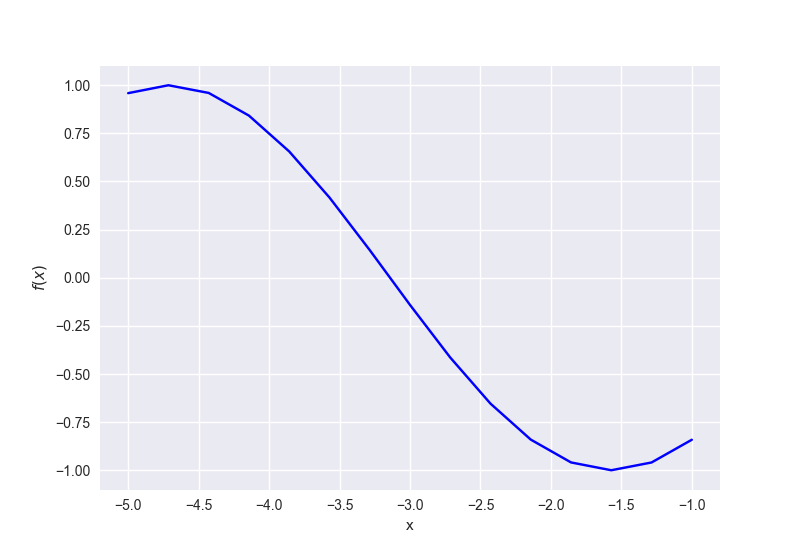

In [5]:
plt.style.use('seaborn')
plt.figure()
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.plot(X, y, '-b')
plt.show()

In [6]:
K = kernel(X, X)
mu = np.zeros([N, 1])
# sample functions from prior distribution
samples = np.random.multivariate_normal(mu.ravel(), K, 6)

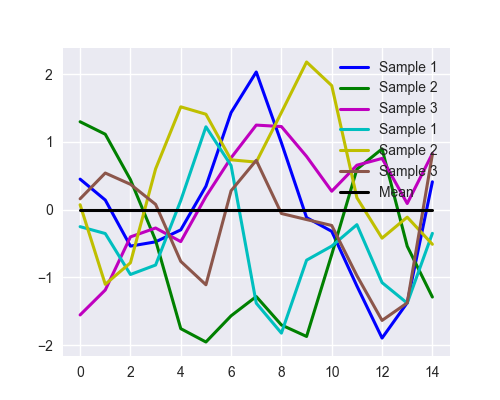

In [11]:
plt.figure(figsize=(5,4))
plt.plot(samples[0], '-b', label='Sample 1', linewidth=2.2)
plt.plot(samples[1], '-g', label='Sample 2', linewidth=2.2)
plt.plot(samples[2], '-m', label='Sample 3', linewidth=2.2)
plt.plot(samples[3], '-c', label='Sample 1', linewidth=2.2)
plt.plot(samples[4], '-y', label='Sample 2', linewidth=2.2)
plt.plot(samples[5], 'tab:brown', label='Sample 3', linewidth=2.2)
plt.plot(mu.ravel(), '-k', label='Mean', linewidth=2.2)
plt.legend()
plt.show()

In [8]:
def posterior_predictive(X_test, X_train, Y_train, kernel_param, sigma_f, sigma_y=1e-8):
    """
    Computes the parameters for GP posterior predictive distribution
    """
    K = kernel(X_train, X_train, kernel_param, sigma_f)
    K_s = kernel(X_train, X_test, kernel_param, sigma_f)
    K_ss = kernel(X_test, X_test, kernel_param, sigma_f) + 1e-6 * np.eye(X_test.shape[0])
    K_inv = np.linalg.inv(K)
    
    m_n = K_s.T @ K_inv @ Y_train
    S_n = K_ss - K_s.T @ K_inv @ K_s
    
    return m_n, S_n

In [9]:
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

indices = (X[:, 0] >= -3) & (X[:, 0] <=0 )
X_filtered = X[indices, 0]
y_filtered = y[indices, 0]
alpha_98 = 2.457
alpha_95 = 2.042

# layout = {'width':'90%', 'height': '80px', 'border': 'solid', 'readout_color': 'red'}
# style = {'handle_color': 'silver'}
@interact(kernel_param=FloatSlider(min=0.1, max=10.0, step=0.1, value=0.6, continuous_update=True),#, layout=layout, style=style),
          sigma_f=FloatSlider(min=1, max=3.0, step=0.5, continuous_update=True))#, layout=layout, style=style))
def plot_gp(kernel_param, sigma_f):
    m_n, S_n = posterior_predictive(Xs, X, y, kernel_param, sigma_f)
    post_std = np.sqrt(np.diag(S_n))
    posterior_samples = np.random.multivariate_normal(m_n.ravel(), S_n, 6)

    plt.figure()
    plt.plot(Xs.ravel(), posterior_samples[0], '-b', label='Sample 1', linewidth=2.2)
    plt.plot(Xs.ravel(), posterior_samples[1], '-g', label='Sample 2', linewidth=2.2)
    plt.plot(Xs.ravel(), posterior_samples[2], '-m', label='Sample 3', linewidth=2.2)
    plt.plot(Xs.ravel(), posterior_samples[3], '-c', label='Sample 4', linewidth=2.2)
    plt.plot(Xs.ravel(), posterior_samples[4], '-y', label='Sample 5', linewidth=2.2)
    plt.plot(Xs.ravel(), posterior_samples[5], 'tab:brown', label='Sample 6', linewidth=2.2)
    plt.plot(Xs.ravel(), m_n.ravel(), '-p', label='Mean', linewidth=2.2)
    plt.scatter(X_filtered.ravel(), y_filtered.ravel(), marker='o', c='k', zorder=10, s=90, label='Training Data')
    lower_bound_98 = m_n.ravel() - alpha_98 * post_std/np.sqrt(n)
    upper_bound_98 = m_n.ravel() + alpha_98 * post_std/np.sqrt(n)
    plt.fill_between(Xs.ravel(), lower_bound_98, upper_bound_98, alpha=0.5, color='k', label='98% Confidence Bounds')
    lower_bound_95 = m_n.ravel() - alpha_95 * post_std/np.sqrt(n)
    upper_bound_95 = m_n.ravel() + alpha_95 * post_std/np.sqrt(n)
    plt.plot(Xs.ravel(), lower_bound_95, '--k', linewidth=1.5, label='95% Confidence Bounds')
    plt.plot(Xs.ravel(), upper_bound_95, '--k', linewidth=1.5)
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=0.6, description='kernel_param', max=10.0, min=0.1), FloatSlider(value…

### Plot here for Github appearance

C:\Users\Rajkumar\AppData\Local\Temp\ipykernel_19212\3089949542.py:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  posterior_samples = np.random.multivariate_normal(m_n.ravel(), S_n, 6)


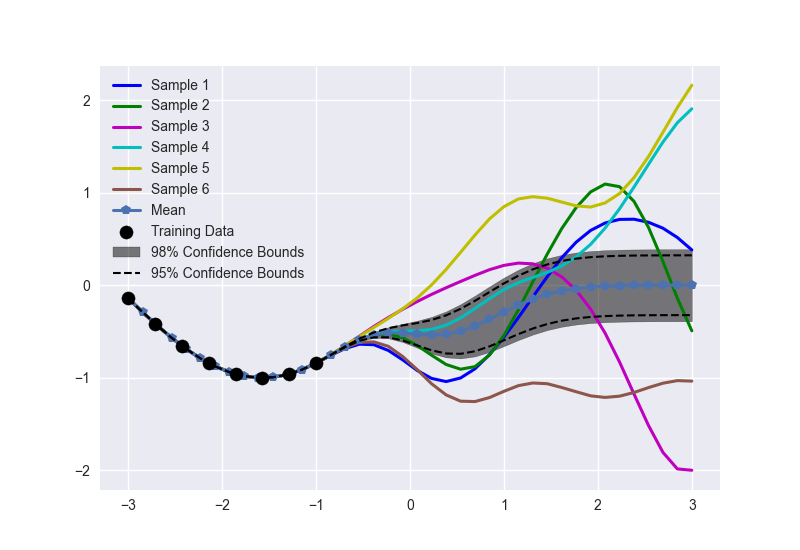

In [10]:
plot_gp(kernel_param=0.6, sigma_f=1)